### Telecom Churn Case Study 


## Syed & Suchith


### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, **telecom companies need to predict which customers are at high risk of **

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

High-value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

In [3]:
# Importing Pandas and NumPy
import os 
import itertools
import requests, json
import pprint 
import warnings
warnings.filterwarnings('ignore') # Suppressing Warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns


#import pandas_profiling as pf

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.cluster import KMeans

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
#Import and Reading Data

In [5]:
df=pd.read_csv('telecom_churn_data.csv', encoding = "ISO-8859-1")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
#Data Understanding and Cleaning + EDA

In [6]:
df.shape

(99999, 226)

In [7]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,...,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,...,0.659363,192.600982,200.981292,197.526489,192.734315,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 167.8+ MB


In [9]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [10]:
df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [11]:
#checking duplicates
sum(df.duplicated(subset = 'mobile_number')) == 0
# No duplicate values

True

In [12]:
#Finding the missing values
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [13]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [14]:
#Removing columns which have all null values
df=df.dropna(axis=1, how='all')
#Removing rows which have all null values
df=df.dropna(axis=0, how='all')

# Filter High Value Customers



We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

In [16]:
df['total_rech_data_6'].fillna(0,inplace=True)
df['total_rech_data_7'].fillna(0,inplace=True)
df['total_rech_data_8'].fillna(0,inplace=True)
df['total_rech_data_9'].fillna(0,inplace=True)

In [17]:
df['av_rech_amt_data_6'].fillna(0,inplace=True)
df['av_rech_amt_data_7'].fillna(0,inplace=True)
df['av_rech_amt_data_8'].fillna(0,inplace=True)
df['av_rech_amt_data_9'].fillna(0,inplace=True)

In [18]:
df['total_data_recharge_amount_6']=df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_data_recharge_amount_7']=df['total_rech_data_7']*df['av_rech_amt_data_7']

df['total_recharge_amt_6']=df['total_rech_amt_6']+df['total_data_recharge_amount_6']
df['total_recharge_amt_7']=df['total_rech_amt_7']+df['total_data_recharge_amount_7']

df['avg_recharge_amount_6_7']=(df['total_recharge_amt_6']+df['total_recharge_amt_7'])/2

In [20]:
l=np.percentile(df['avg_recharge_amount_6_7'],70)
df=df[(df['total_rech_amt_6']>=l) | (df['total_rech_amt_7']>=l)]

# Tagging churn customers

Now we tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, we remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [21]:
df['churn']=np.where(((df['total_ic_mou_9']==0) | (df['total_og_mou_9']==0)) & ((df['vol_2g_mb_9']==0) | (df['vol_3g_mb_9']==0)),1,0)

In [22]:
col=list(df.columns)

#removing columns that have data of churn phase
col=[i for i in col if '_9' not in i]

In [23]:
df=df[col]

In [24]:
amt_recharge_columns =  df.columns[df.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')


In [25]:
df.loc[:,amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,29637.000000,29637.000000,29637.000000,29637.000000,29637.000000,29637.000000,29637.000000,29637.000000,29637.000000,10978.000000,11142.000000,11205.000000,29637.000000,29637.000000,29637.000000
mean,693.144043,687.417350,606.434423,172.779566,175.310187,162.418801,0.897156,1.006951,0.978372,153.744853,154.641537,145.193217,90.474552,96.635516,88.298828
std,552.473082,577.911543,614.940468,179.773119,186.361380,177.834422,2.111919,2.371068,2.356054,127.305782,128.625117,128.242230,192.974446,199.929266,186.483449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,465.000000,442.000000,280.000000,110.000000,110.000000,61.000000,0.000000,0.000000,0.000000,41.000000,41.000000,25.000000,0.000000,0.000000,0.000000
50%,598.000000,594.000000,521.000000,120.000000,128.000000,130.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,0.000000,0.000000,0.000000
75%,842.000000,840.000000,800.000000,200.000000,200.000000,198.000000,1.000000,1.000000,1.000000,252.000000,252.000000,198.000000,149.000000,154.000000,145.000000
max,35190.000000,40335.000000,45320.000000,4010.000000,4010.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4061.000000


In [26]:
df['total_rech_data_6'] = df['total_rech_data_6'].replace(np.NaN,0.0)
df['total_rech_data_7'] = df['total_rech_data_7'].replace(np.NaN,0.0)
df['total_rech_data_8'] = df['total_rech_data_8'].replace(np.NaN,0.0)
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].replace(np.NaN,0.0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].replace(np.NaN,0.0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [27]:
df['good_phase_recharge'] = df['total_rech_amt_6'] + df['total_rech_amt_7']

In [28]:
def convert_to_datetime(_x, _columns):
    _x[_columns] = _x[_columns].apply(pd.to_datetime, format='%m/%d/%Y')
    return _x


_columns = [
     'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
]
df[_columns] = convert_to_datetime(df[_columns], _columns)

In [29]:
col=[i for i in df.columns if 'sep_' not in i]

In [30]:
#Filling null values
col=['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
    'night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','monthly_2g_6','monthly_2g_7',
    'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8',
    'sachet_3g_6','sachet_3g_7','sachet_3g_8']

for i in col:
    df[i].fillna(0,inplace=True)

In [31]:
# Checking the percentage of missing values
#Removing those columns with more than 50% null values
l=pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)), 2))
k=list(l[l[0]>50].index)

k=[i for i in df.columns if i not in k]

df=df[k]

#Deleting rows which have more than 30% null values
df=df.dropna(thresh=116)

#Dropping all null values
df=df.dropna()

In [32]:
col=[i for i in df.columns if 'date' in i]
for i in col:
    df[i]=pd.to_datetime(df[i])
    

df['date_of_last_rech_6']=df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_7']=df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_8']=df['date_of_last_rech_8'].dt.day

df['diff_in_dates_6']=df['last_date_of_month_6'].dt.day-df['date_of_last_rech_6']
df['diff_in_dates_7']=df['last_date_of_month_7'].dt.day-df['date_of_last_rech_7']
df['diff_in_dates_8']=df['last_date_of_month_8'].dt.day-df['date_of_last_rech_8']

In [33]:
df=df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6',
           'last_date_of_month_7','last_date_of_month_8'],1)

In [34]:

df['total_data_recharge_amount_8']=df['total_rech_data_8']*df['av_rech_amt_data_8']
df['total_recharge_amt_8']=df['total_rech_amt_8']+df['total_data_recharge_amount_8']

In [35]:
df=df.drop(['total_rech_amt_8','total_rech_data_8','av_rech_amt_data_8','total_data_recharge_amount_8',
           'total_rech_amt_7','total_rech_data_7','av_rech_amt_data_7','total_data_recharge_amount_7',
           'total_rech_amt_6','total_rech_data_6','av_rech_amt_data_6','total_data_recharge_amount_6','avg_recharge_amount_6_7'],1)

In [36]:
df.shape

(27308, 153)

In [37]:
#Outputting the data to a new file
df.to_csv('df.csv',index=False)

In [39]:
df=pd.read_csv('df.csv',encoding = "ISO-8859-1")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,...,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_amt_6,total_recharge_amt_7,churn,good_phase_recharge,diff_in_dates_6,diff_in_dates_7,diff_in_dates_8,total_recharge_amt_8
0,7001051193,109,0.0,0.0,0.0,429.023,190.704,255.114,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.00,0.00,0.11,0.0,0.00,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.53,11.96,...,11,90,37,50,37,24,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1673,0.00,0.00,0.00,0.0,499.0,222.0,0,721,2,0,3,294.0
1,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,...,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,1580.0,790.0,1,2370,3,6,5,3638.0
2,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,...,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,437.0,955.0,0,1038,5,0,1,327.0
3,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,...,11,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,3,0,0,0,0,0,0,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.0,507.0,253.0,0,760,10,9,1,924.0
4,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.0,0.0,30.89,67.09,21.53,...,2,110,110,130,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.0,570.0,348.0,0,918,0,0,17,160.0


In [40]:
X=df.drop(['mobile_number','circle_id','churn'],1)

y=df['churn']

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA and Model Building


Building models to predict churn. The predictive model that we are going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In [6]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(X_train)

array([[ 2.25956319e+00,  3.07768663e-01, -1.75192306e+00, ...,
         6.48497179e-16, -4.55815503e-16, -8.18275794e-16],
       [-3.05957748e+00, -8.38027984e-01, -1.08035411e+00, ...,
        -6.70184947e-15,  8.45739899e-15,  7.19629143e-15],
       [ 1.13815934e+00, -2.09133806e+00, -1.35208456e+00, ...,
        -3.24195712e-15,  5.14433634e-15,  2.99001125e-15],
       ...,
       [-2.07029215e+00, -8.02965178e-01, -1.45007614e+00, ...,
        -1.80508638e-17,  2.71897781e-17, -8.81040155e-19],
       [ 6.79696891e+00, -3.11904618e+00,  4.11150757e-01, ...,
         2.01467734e-18, -6.35100750e-17, -5.20249086e-17],
       [-9.24060989e-01, -3.56821818e+00,  1.18582005e+00, ...,
         1.02264908e-17, -8.37666391e-19, -2.78702794e-17]])

In [7]:
pca.components_.round(3)

array([[-0.   , -0.   , -0.   , ...,  0.015,  0.014,  0.105],
       [-0.   ,  0.   , -0.   , ..., -0.068, -0.065, -0.015],
       [ 0.   ,  0.   , -0.   , ..., -0.059, -0.065,  0.2  ],
       ...,
       [ 0.   , -0.225, -0.054, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , -0.028,  0.236, ..., -0.   ,  0.   , -0.   ],
       [ 0.   , -0.241,  0.54 , ...,  0.   , -0.   ,  0.   ]])

In [8]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,-7.699908e-17,-6.045695e-17,loc_og_t2o_mou
1,-2.220446e-16,2.220446e-16,std_og_t2o_mou
2,-0.000000e+00,-4.440892e-16,loc_ic_t2o_mou
3,9.151217e-02,1.270312e-01,arpu_6
4,8.798835e-02,1.388410e-01,arpu_7
5,9.388784e-02,1.315140e-01,arpu_8
6,-4.372620e-02,1.483869e-01,onnet_mou_6
7,-5.048372e-02,1.663559e-01,onnet_mou_7
8,-3.960428e-02,1.630844e-01,onnet_mou_8
9,1.874216e-02,1.684070e-01,offnet_mou_6


In [9]:
pca.explained_variance_ratio_.round(4)

array([0.0902, 0.08  , 0.0695, 0.0472, 0.0423, 0.0346, 0.03  , 0.0272,
       0.0259, 0.0247, 0.0232, 0.0207, 0.02  , 0.0198, 0.019 , 0.0182,
       0.0163, 0.0158, 0.0146, 0.0143, 0.0131, 0.0115, 0.0114, 0.0105,
       0.0101, 0.01  , 0.0096, 0.0091, 0.0087, 0.0083, 0.0077, 0.0074,
       0.0072, 0.0071, 0.0068, 0.0066, 0.0064, 0.0063, 0.0061, 0.0059,
       0.0058, 0.0057, 0.0056, 0.0055, 0.0055, 0.0052, 0.0051, 0.0051,
       0.0049, 0.0048, 0.0046, 0.0045, 0.0045, 0.0042, 0.004 , 0.0038,
       0.0036, 0.0036, 0.0035, 0.0034, 0.0032, 0.0031, 0.003 , 0.0029,
       0.0028, 0.0028, 0.0027, 0.0027, 0.0025, 0.0025, 0.0024, 0.0023,
       0.0022, 0.0022, 0.0022, 0.0022, 0.0021, 0.0021, 0.002 , 0.0019,
       0.0019, 0.0018, 0.0017, 0.0017, 0.0016, 0.0016, 0.0016, 0.0015,
       0.0015, 0.0015, 0.0015, 0.0014, 0.0014, 0.0014, 0.0014, 0.0012,
       0.0012, 0.0011, 0.001 , 0.0009, 0.0009, 0.0008, 0.0008, 0.0006,
       0.0006, 0.0006, 0.0005, 0.0002, 0.0002, 0.0002, 0.0001, 0.    ,
      

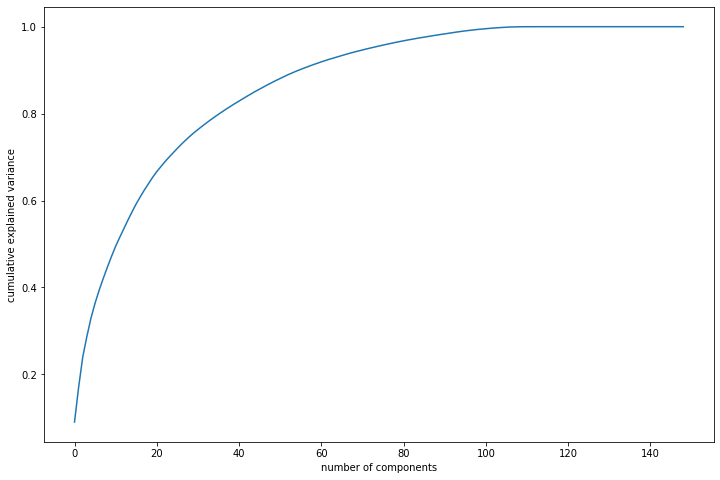

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
pca_final = IncrementalPCA(n_components=80)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape


(21846, 80)

In [5]:
#Data Visualisation

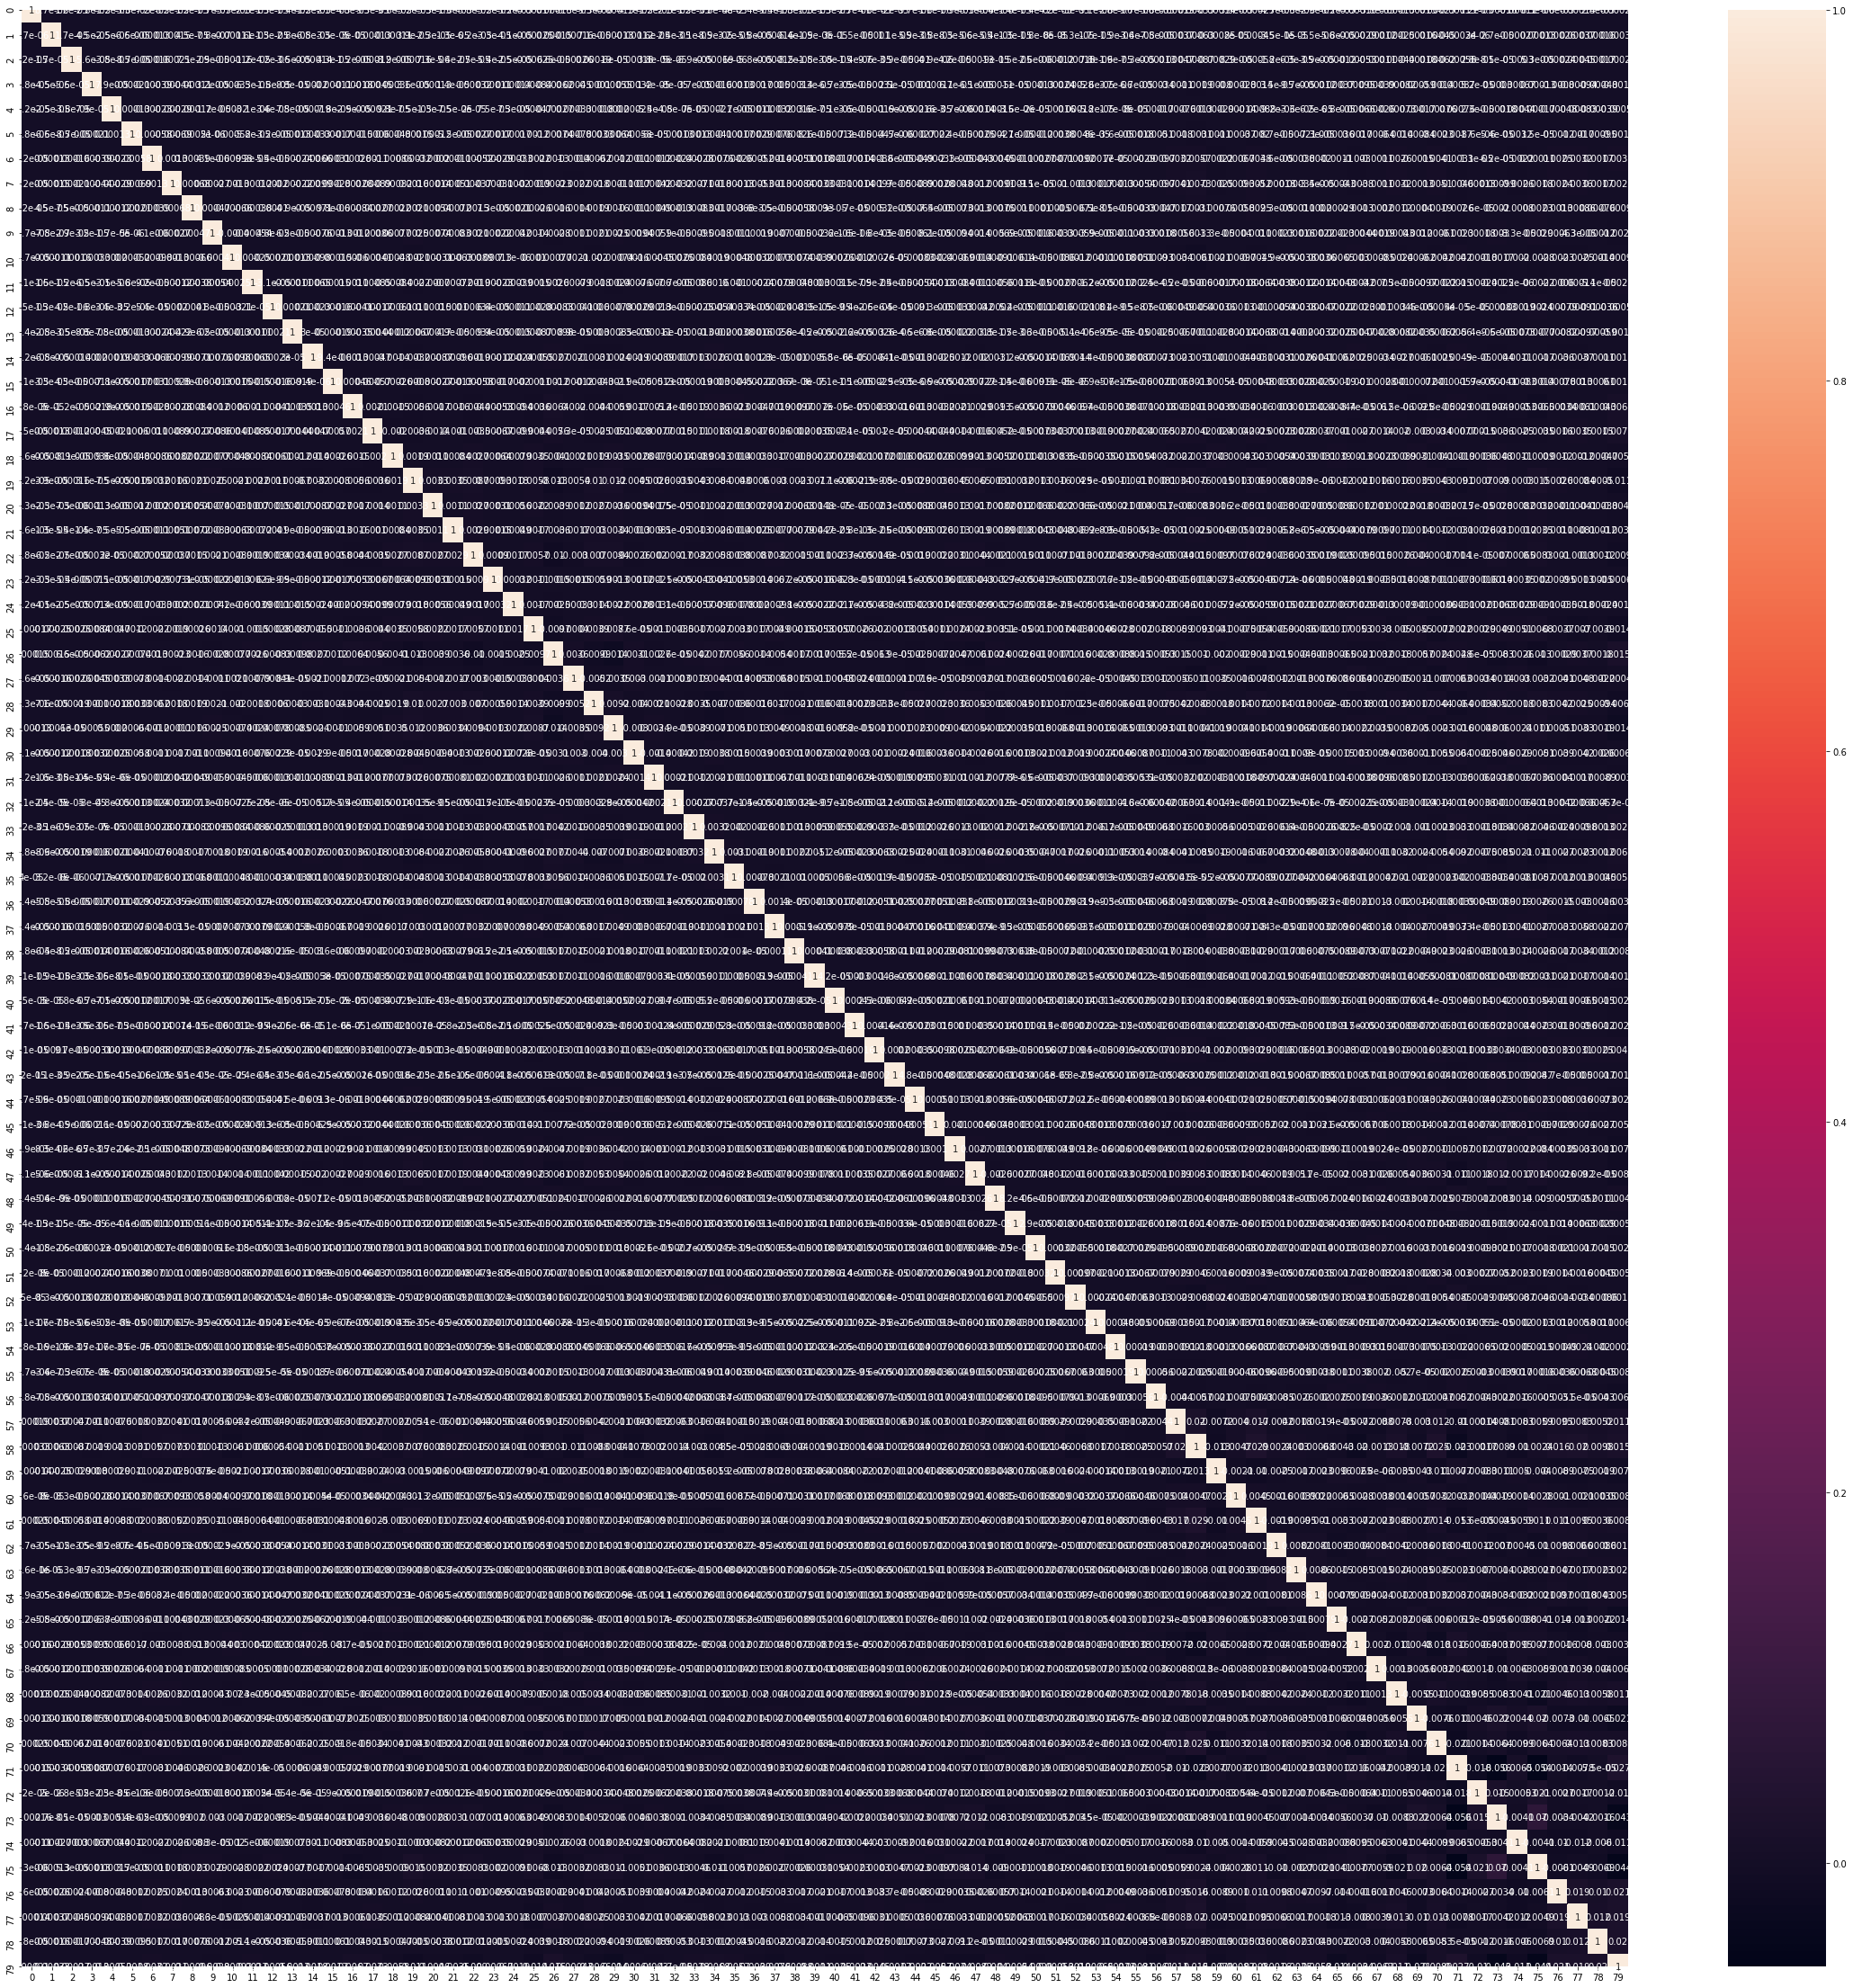

In [12]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(40, 40))
sns.heatmap(corrmat, annot=True)

In [11]:
pca_test_data = pca_final.transform(X_test)
pca_test_data.shape

(5462, 80)

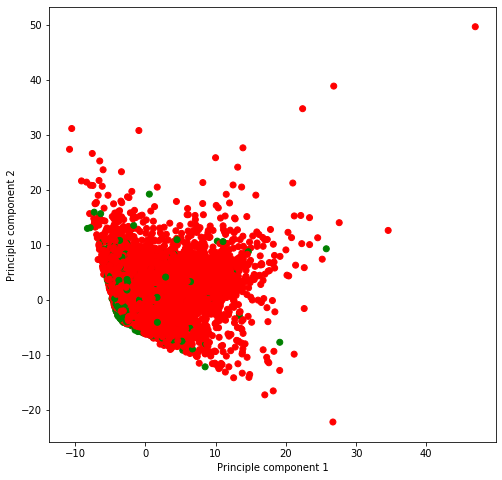

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c= y_train.map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()

In [22]:
pca_column_frame = pcs_df.head(85)
pca_column_frame.head()

,PC1,PC2,Feature
0,-7.699908e-17,-6.045695e-17,loc_og_t2o_mou
1,-2.220446e-16,2.220446e-16,std_og_t2o_mou
2,-0.000000e+00,-4.440892e-16,loc_ic_t2o_mou
3,9.151217e-02,1.270312e-01,arpu_6
4,8.798835e-02,1.388410e-01,arpu_7


# Building models using PCA

In [23]:
### Logistic regression with PCA:

In [25]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [26]:
predictions = rfc.predict(pca_test_data)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5014
           1       0.00      0.00      0.00       448

    accuracy                           0.92      5462
   macro avg       0.46      0.50      0.48      5462
weighted avg       0.84      0.92      0.88      5462



In [27]:
print(confusion_matrix(y_test, predictions))

[[5014    0]
 [ 448    0]]


In [28]:
#We can see that in both the cases only 0's are predicted which is a clear case of class imbalance

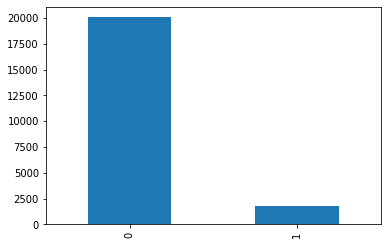

In [29]:
y_train.value_counts().plot.bar()

In [30]:
#We can see that there is class imbalance in the data which is highly dangerous

# Sampling to handle data imbalance

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(return_indices=True)

# x_ros, y_ros, ind = ros.fit_sample(x_train, y_train)
# x_test_ros, y_test_ros, ind = ros.fit_sample(x_test, y_test)

x_ros, y_ros, ind = ros.fit_sample(df_train_pca, y_train)

Using TensorFlow backend.


In [32]:
import seaborn as sns

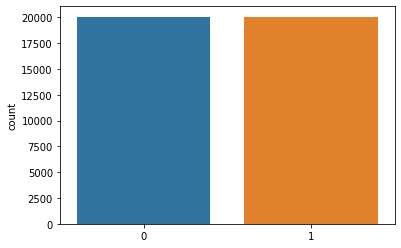

In [33]:
sns.countplot(y_ros)

In [39]:
#Now both occurences are equal

In [15]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = LogisticRegression()
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    print("Precision Score: \t {0:.4f}".format(precision_score(y_test_data, 
                                                           predictions, 
                                                           average='weighted')))
    print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test_data, 
                                                           predictions, 
                                                     average='weighted')))
    print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test_data, 
                                                           predictions, 
                                             average='weighted')))
    return rf

In [16]:
def fit_decision_tree(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = DecisionTreeClassifier(max_depth=3)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    print("Precision Score: \t {0:.4f}".format(precision_score(y_test_data, 
                                                           predictions, 
                                                           average='weighted')))
    print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test_data, 
                                                           predictions, 
                                                     average='weighted')))
    print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test_data, 
                                                           predictions, 
                                             average='weighted')))
    return rf

In [17]:
def fit_random_forest(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    print("Precision Score: \t {0:.4f}".format(precision_score(y_test_data, 
                                                           predictions, 
                                                           average='weighted')))
    print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test_data, 
                                                           predictions, 
                                                     average='weighted')))
    print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test_data, 
                                                           predictions, 
                                             average='weighted')))
    return rf

In [18]:
def fit_adaboost(x_train_data, x_test_data, y_train_data, y_test_data):
    shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
    rf = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators=50,learning_rate=1)
    
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    print("Precision Score: \t {0:.4f}".format(precision_score(y_test_data, 
                                                           predictions, 
                                                           average='weighted')))
    print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test_data, 
                                                           predictions, 
                                                     average='weighted')))
    print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test_data, 
                                                           predictions, 
                                             average='weighted')))
    return rf

In [19]:
def fit_gradientBoosting(x_train_data, x_test_data, y_train_data, y_test_data):

    rf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
    
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    print("Precision Score: \t {0:.4f}".format(precision_score(y_test_data, 
                                                           predictions, 
                                                           average='weighted')))
    print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test_data, 
                                                           predictions, 
                                                     average='weighted')))
    print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test_data, 
                                                           predictions, 
                                             average='weighted')))
    return rf

In [20]:
def fit_xgboost(x_train_data, x_test_data, y_train_data, y_test_data):

    rf = XGBClassifier()
    
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    print("Precision Score: \t {0:.4f}".format(precision_score(y_test_data, 
                                                           predictions, 
                                                           average='weighted')))
    print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test_data, 
                                                           predictions, 
                                                     average='weighted')))
    print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test_data, 
                                                           predictions, 
                                             average='weighted')))
    return rf

In [45]:
rfe_algo = fit_random_forest(x_ros,pca_test_data, y_ros, y_test)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5014
           1       0.26      0.71      0.38       448

    accuracy                           0.81      5462
   macro avg       0.61      0.76      0.63      5462
weighted avg       0.91      0.81      0.85      5462

0.8110582204320762
[[4113  901]
 [ 131  317]]


### Oversampling followed by under sampling:

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt_train, y_smt_train = smt.fit_sample(df_train_pca, y_train)

In [22]:
lr_algo = fit_logistic_regression(x_ros,pca_test_data, y_ros, y_test)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5014
           1       0.26      0.81      0.40       448

    accuracy                           0.80      5462
   macro avg       0.62      0.80      0.64      5462
weighted avg       0.92      0.80      0.84      5462

0.7987916514097401
[[4001 1013]
 [  86  362]]
Precision Score: 	 0.9203
Recall Score: 		 0.7988
F1 Score: 		 0.8397


In [23]:
ds_tree=fit_decision_tree(x_ros,pca_test_data, y_ros, y_test)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      5014
           1       0.22      0.68      0.33       448

    accuracy                           0.77      5462
   macro avg       0.59      0.73      0.59      5462
weighted avg       0.90      0.77      0.82      5462

0.7702306847308679
[[3901 1113]
 [ 142  306]]
Precision Score: 	 0.9034
Recall Score: 		 0.7702
F1 Score: 		 0.8177


In [24]:
rfe_algo = fit_random_forest(x_ros,pca_test_data, y_ros, y_test)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5014
           1       0.26      0.70      0.38       448

    accuracy                           0.81      5462
   macro avg       0.61      0.76      0.63      5462
weighted avg       0.91      0.81      0.85      5462

0.8108751373123398
[[4114  900]
 [ 133  315]]
Precision Score: 	 0.9105
Recall Score: 		 0.8109
F1 Score: 		 0.8467


In [25]:
adaboost=fit_adaboost(x_ros,pca_test_data, y_ros, y_test)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      5014
           1       0.28      0.70      0.40       448

    accuracy                           0.82      5462
   macro avg       0.62      0.77      0.65      5462
weighted avg       0.91      0.82      0.86      5462

0.8242402050530941
[[4187  827]
 [ 133  315]]
Precision Score: 	 0.9123
Recall Score: 		 0.8242
F1 Score: 		 0.8561


In [26]:
gboost=fit_gradientBoosting(x_ros,pca_test_data, y_ros, y_test)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      5014
           1       0.22      0.71      0.34       448

    accuracy                           0.77      5462
   macro avg       0.59      0.74      0.60      5462
weighted avg       0.91      0.77      0.82      5462

0.7704137678506042
[[3892 1122]
 [ 132  316]]
Precision Score: 	 0.9059
Recall Score: 		 0.7704
F1 Score: 		 0.8181


In [62]:
#Tuning Gradient Boosting acroos learning rates

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_ros, y_ros)

    print("Learning rate: ", learning_rate)
    predictions = gb_clf.predict(pca_test_data)
    print(accuracy_score(y_true=y_test, y_pred=predictions))

Learning rate:  0.05
0.764188941779568
Learning rate:  0.075
0.7634566093006225
Learning rate:  0.1
0.7638227755400953
Learning rate:  0.25
0.7702306847308679
Learning rate:  0.5
0.7674844379348225
Learning rate:  0.75
0.7731600146466496
Learning rate:  1
0.768766019772977


In [27]:
xgboost=fit_xgboost(x_ros,pca_test_data, y_ros, y_test)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      5014
           1       0.28      0.75      0.41       448

    accuracy                           0.82      5462
   macro avg       0.63      0.79      0.65      5462
weighted avg       0.92      0.82      0.86      5462

0.8236909556938851
[[4162  852]
 [ 111  337]]
Precision Score: 	 0.9174
Recall Score: 		 0.8237
F1 Score: 		 0.8566


In [65]:
#With SMOTE Training Data

In [28]:
lr_algo = fit_logistic_regression(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.81      0.88      5014
           1       0.27      0.80      0.40       448

    accuracy                           0.81      5462
   macro avg       0.62      0.80      0.64      5462
weighted avg       0.92      0.81      0.85      5462

0.8068473086781399
[[4048  966]
 [  89  359]]
Precision Score: 	 0.9205
Recall Score: 		 0.8068
F1 Score: 		 0.8454


In [29]:
ds_tree=fit_decision_tree(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      5014
           1       0.22      0.70      0.33       448

    accuracy                           0.77      5462
   macro avg       0.59      0.74      0.59      5462
weighted avg       0.91      0.77      0.82      5462

0.7669351885756134
[[3875 1139]
 [ 134  314]]
Precision Score: 	 0.9050
Recall Score: 		 0.7669
F1 Score: 		 0.8156


In [30]:
rfe_algo = fit_random_forest(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      5014
           1       0.24      0.68      0.35       448

    accuracy                           0.79      5462
   macro avg       0.60      0.74      0.61      5462
weighted avg       0.91      0.79      0.83      5462

0.7945807396558038
[[4037  977]
 [ 145  303]]
Precision Score: 	 0.9056
Recall Score: 		 0.7946
F1 Score: 		 0.8347


In [31]:
adaboost=fit_adaboost(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      5014
           1       0.27      0.71      0.39       448

    accuracy                           0.82      5462
   macro avg       0.62      0.77      0.64      5462
weighted avg       0.91      0.82      0.85      5462

0.8198462101794215
[[4159  855]
 [ 129  319]]
Precision Score: 	 0.9126
Recall Score: 		 0.8198
F1 Score: 		 0.8531


In [32]:
gboost=fit_gradientBoosting(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      5014
           1       0.23      0.69      0.34       448

    accuracy                           0.78      5462
   macro avg       0.60      0.74      0.61      5462
weighted avg       0.91      0.78      0.83      5462

0.7826803368729404
[[3965 1049]
 [ 138  310]]
Precision Score: 	 0.9058
Recall Score: 		 0.7827
F1 Score: 		 0.8266


In [33]:
xgboost=fit_xgboost(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      5014
           1       0.29      0.74      0.41       448

    accuracy                           0.83      5462
   macro avg       0.63      0.79      0.66      5462
weighted avg       0.92      0.83      0.86      5462

0.8293665324057122
[[4200  814]
 [ 118  330]]
Precision Score: 	 0.9166
Recall Score: 		 0.8294
F1 Score: 		 0.8603


In [34]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = LogisticRegression()
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    print("Precision Score: \t {0:.4f}".format(precision_score(y_test_data, 
                                                           predictions, 
                                                           average='weighted')))
    print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test_data, 
                                                           predictions, 
                                                     average='weighted')))
    print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test_data, 
                                                           predictions, 
                                             average='weighted')))
    return rf

In [35]:
log_alg = fit_logistic_regression(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.81      0.88      5014
           1       0.27      0.80      0.40       448

    accuracy                           0.81      5462
   macro avg       0.62      0.80      0.64      5462
weighted avg       0.92      0.81      0.85      5462

0.8068473086781399
[[4048  966]
 [  89  359]]
Precision Score: 	 0.9205
Recall Score: 		 0.8068
F1 Score: 		 0.8454


Tuning Logistic Regression Model

# LOGISTIC REGRESSION

We use Logistic regression Model as the goal here is **to predict which customers are at high risk of churn**.The Evaluation Metric for Logistic regression to be chosen is due to its high recall value compared to other models

Among 89 customers who have churned are predicted as not churn.This is a low value compared to other models.
Where as 966 customers are predicted as churned although they have not churned.This is not much of an impact as these customers can be rolled out disconts and other strategies as part of the customers who are likely to churn which could improve customer satisfaction.Hence,we wil tune logistic regression model to improve our recall rate even more

In [49]:
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15) 

param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
  
logreg_cv.fit(x_smt_train, y_smt_train) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.8279060489702289


In [50]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = LogisticRegression(C=31.622776601683793)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    print("Precision Score: \t {0:.4f}".format(precision_score(y_test_data, 
                                                           predictions, 
                                                           average='weighted')))
    print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test_data, 
                                                           predictions, 
                                                     average='weighted')))
    print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test_data, 
                                                           predictions, 
                                             average='weighted')))
    return rf

In [51]:
log_alg = fit_logistic_regression(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.81      0.88      5014
           1       0.27      0.80      0.40       448

    accuracy                           0.81      5462
   macro avg       0.62      0.80      0.64      5462
weighted avg       0.92      0.81      0.85      5462

0.8068473086781399
[[4048  966]
 [  89  359]]
Precision Score: 	 0.9205
Recall Score: 		 0.8068
F1 Score: 		 0.8454


In [52]:
_percentage = log_alg.predict_proba(x_smt_train)[:,1]

In [53]:
churn_predicted = pd.DataFrame({})
churn_predicted['ChurnProbability'] = _percentage
churn_predicted['y_train'] = y_smt_train
churn_predicted.head(10)

,ChurnProbability,y_train
0,2.595376e-01,0
1,2.332181e-01,0
2,4.228453e-02,0
3,2.326004e-01,0
4,1.351130e-02,0
5,3.121511e-08,0
6,3.185592e-04,0
7,9.559373e-01,1
8,3.416054e-03,0
9,7.677751e-05,0


In [56]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob','accuracy','sensi','speci','precision','recall','f1_score'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    
    preci = cm[1,1] / (cm[1,1]+cm[0,1])
    recal = cm[1,1] / (cm[1,1]+cm[1,0])
    f1_score = 2 * ((preci*recal)/(preci+recal))
    cutoff.loc[_prob] = [ _prob, _accuracy, _sensitivity,  _specificity ,preci,recal,f1_score]
    
cutoff

,prob,accuracy,sensi,speci,precision,recall,f1_score
0.0,0.0,0.500,1.000,0.000,0.500000,1.000000,0.666667
0.1,0.1,0.685,0.979,0.392,0.616676,0.978507,0.756555
0.2,0.2,0.753,0.956,0.550,0.679781,0.955518,0.794403
0.3,0.3,0.792,0.928,0.657,0.730177,0.927642,0.817150
0.4,0.4,0.818,0.896,0.740,0.775260,0.895726,0.831151
0.5,0.5,0.828,0.851,0.806,0.814338,0.850845,0.832191
0.6,0.6,0.826,0.788,0.865,0.853486,0.788112,0.819497
0.7,0.7,0.805,0.703,0.907,0.882913,0.703187,0.782867
0.8,0.8,0.751,0.559,0.943,0.906994,0.558769,0.691517
0.9,0.9,0.613,0.250,0.977,0.916179,0.249638,0.392366


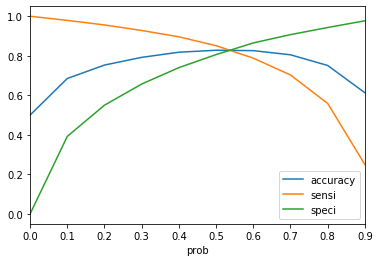

In [61]:
cutoff.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

In [94]:
# Predicted probabilities on test data
y_pred =log_alg.predict_proba(pca_test_data)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['id'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'predicted' with 1 if Churn_Prob>0.4 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.52 else 0)
#Let's check the overall accuracy.
print(accuracy_score(y_pred_final.churn, y_pred_final.predicted))
print(confusion_matrix(y_pred_final.churn, y_pred_final.predicted))


0.8167337971439034
[[4107  907]
 [  94  354]]


In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

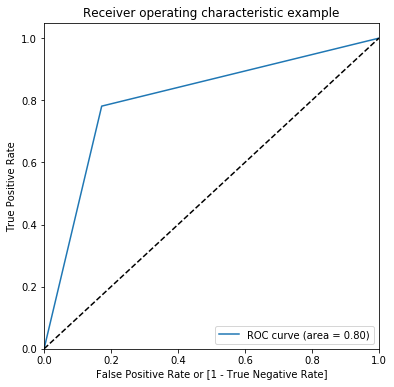

(array([0.        , 0.17211807, 1.        ]),
 array([0.     , 0.78125, 1.     ]),
 array([2, 1, 0], dtype=int64))

In [69]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

Hyperparameter tuning with XGBoost

In [77]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [78]:
# fit the model
model_cv.fit(x_smt_train, y_smt_train)    

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 10.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [79]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,27.022719,0.950912,0.123869,0.013826,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.918038,0.930540,0.925887,0.924822,0.005159,5,0.939935,0.935668,0.937288,0.937630,0.001759
1,36.657900,0.038304,0.124540,0.003582,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.921006,0.931481,0.924879,0.925788,0.004325,3,0.941581,0.937358,0.938097,0.939012,0.001841
2,44.131226,0.148924,0.121938,0.002065,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.919625,0.929154,0.925361,0.924713,0.003917,6,0.941362,0.936920,0.938562,0.938948,0.001834
3,26.338988,0.072669,0.123605,0.002788,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.919831,0.929564,0.925180,0.924859,0.003980,4,0.953391,0.949055,0.951857,0.951434,0.001795
4,36.686675,0.049182,0.126405,0.006939,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.930883,0.941415,0.936856,0.936385,0.004313,2,0.963991,0.961115,0.961409,0.962172,0.001292
5,43.757997,0.020317,0.117738,0.006092,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.934295,0.944197,0.940301,0.939598,0.004073,1,0.965147,0.962682,0.963404,0.963744,0.001034


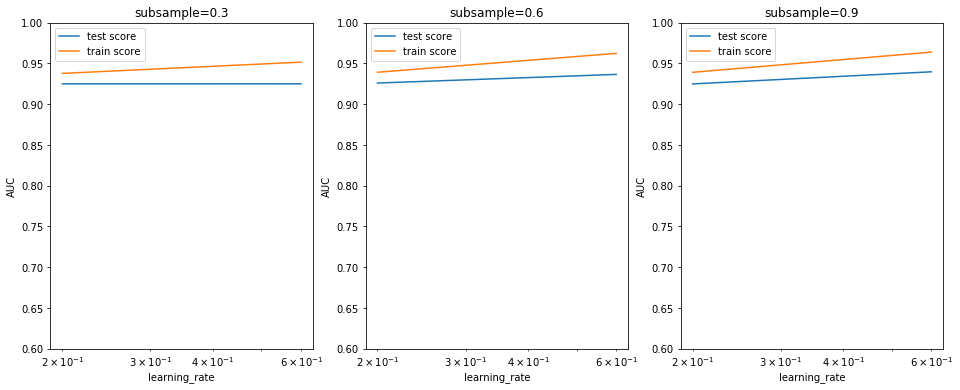

In [81]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [82]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.4,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(x_smt_train, y_smt_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [86]:
# predict
y_pred = model.predict_proba(pca_test_data)
y_pred[:10]

array([[0.7684188 , 0.23158121],
       [0.18334454, 0.81665546],
       [0.49692   , 0.50308   ],
       [0.8957374 , 0.1042626 ],
       [0.8381533 , 0.16184671],
       [0.8337695 , 0.1662305 ],
       [0.7500597 , 0.24994029],
       [0.87646663, 0.12353338],
       [0.86302215, 0.13697785],
       [0.41642237, 0.58357763]], dtype=float32)

In [87]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.8643160757023192

In [90]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
rf =XGBClassifier(learning_rate =0.1, n_estimators=140, 
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, seed=27)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True)
rf.fit(x_smt_train, y_smt_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(2, 20, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [95]:
# scores of GridSearch CV
scores = rf.cv_results_
k=pd.DataFrame(scores).head()

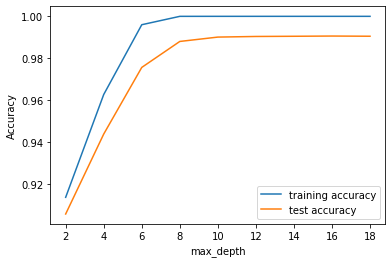

In [96]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [100]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# parameters to build the model on
param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}        


# specify model
xgb_model = XGBClassifier(max_depth=8, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  
# fit the model
model_cv.fit(x_smt_train, y_smt_train) 

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 45.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=8, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc'

In [101]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,177.974837,0.224953,0.312001,2.247832e-07,0,{'gamma': 0.0},0.988673,0.992046,0.990287,0.990335,0.001378,2,1.0,1.0,1.0,1.0,9.064933e-17
1,189.027577,12.838185,0.371468,7.157408e-02,0.1,{'gamma': 0.1},0.989181,0.992204,0.990017,0.990468,0.001275,1,1.0,1.0,1.0,1.0,0.000000e+00
2,178.365475,0.216235,0.318668,7.159667e-03,0.2,{'gamma': 0.2},0.988555,0.992053,0.990297,0.990302,0.001428,3,1.0,1.0,1.0,1.0,0.000000e+00
3,178.265504,0.081447,0.313140,9.839465e-04,0.3,{'gamma': 0.3},0.988405,0.992195,0.990203,0.990268,0.001548,4,1.0,1.0,1.0,1.0,0.000000e+00
4,178.378806,0.227486,0.310940,3.276783e-03,0.4,{'gamma': 0.4},0.988736,0.991480,0.990053,0.990090,0.001120,5,1.0,1.0,1.0,1.0,0.000000e+00


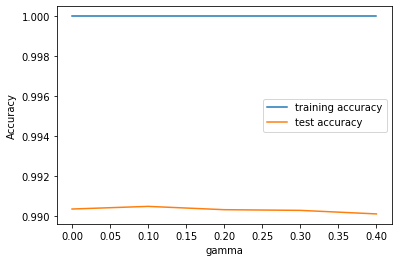

In [104]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_gamma"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_gamma"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("gamma")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [70]:

def fit_xgboost(x_train_data, x_test_data, y_train_data, y_test_data):

    rf = XGBClassifier( learning_rate =0.4,
         n_estimators=200,
         max_depth=8,
         gamma=0.1,
         subsample=0.6,
         objective= 'binary:logistic')
    
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    return rf

In [71]:

xgboost=fit_xgboost(x_smt_train,pca_test_data, y_smt_train, y_test)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5014
           1       0.43      0.48      0.45       448

    accuracy                           0.90      5462
   macro avg       0.69      0.71      0.70      5462
weighted avg       0.91      0.90      0.91      5462

0.9046136946173563
[[4727  287]
 [ 234  214]]


In [72]:
_percentage = xgboost.predict_proba(x_smt_train)[:,1]

In [73]:
churn_predicted = pd.DataFrame({})
churn_predicted['ChurnProbability'] = _percentage
churn_predicted['y_train'] = y_smt_train
churn_predicted.head(10)

,ChurnProbability,y_train
0,1.599609e-04,0
1,1.357939e-04,0
2,1.744532e-03,0
3,2.529935e-03,0
4,1.473186e-03,0
5,4.104974e-06,0
6,1.356655e-04,0
7,9.986752e-01,1
8,2.875577e-07,0
9,2.056100e-04,0


In [74]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    cutoff.loc[_prob] = [ _prob, _accuracy, _sensitivity,  _specificity ]
    
cutoff

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.5,1.0,0.0
0.1,0.1,1.0,1.0,1.0
0.2,0.2,1.0,1.0,1.0
0.3,0.3,1.0,1.0,1.0
0.4,0.4,1.0,1.0,1.0
0.5,0.5,1.0,1.0,1.0
0.6,0.6,1.0,1.0,1.0
0.7,0.7,1.0,1.0,1.0
0.8,0.8,1.0,1.0,1.0
0.9,0.9,1.0,1.0,1.0


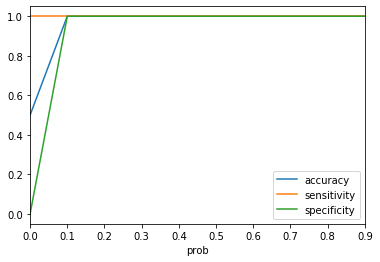

In [75]:
cutoff.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

In [76]:
# Predicted probabilities on test data
y_pred = xgboost.predict_proba(pca_test_data)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['id'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Creating new column 'predicted' with 1 if Churn_Prob>0.4 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)
#Let's check the overall accuracy.
accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8824606371292567

In [77]:
y_pred_final

,churn,id,Churn_Prob,predicted
0,0,9424,7.686618e-03,0
1,1,1560,8.864138e-01,1
2,0,9190,2.347308e-02,0
3,0,20143,2.026380e-06,0
4,0,2808,1.184248e-04,0
5,0,7031,7.472007e-06,0
6,0,25517,3.885296e-02,0
7,0,24181,2.666276e-04,0
8,0,26754,1.688306e-03,0
9,0,25224,4.240803e-05,0


In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

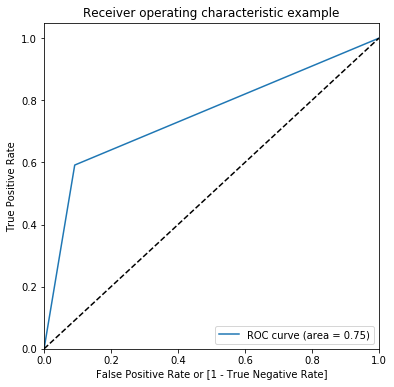

(array([0.        , 0.09154368, 1.        ]),
 array([0.        , 0.59151786, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [79]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

# Building another model with the main objective of identifying important predictor attributes

In [95]:
from sklearn.linear_model import LogisticRegression
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
  True False  True False False False False False False False False False
 False False False  True  True  True  True  True False False False  True
 False False False  True False  True False False False False False False
 False  True False  True False]
[130 129 128  90 103  98  17  78 112  18 106  60 107  70 116  12  49  59
  14  76   1  13 11

In [100]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 130),
 ('std_og_t2o_mou', False, 129),
 ('loc_ic_t2o_mou', False, 128),
 ('arpu_6', False, 90),
 ('arpu_7', False, 103),
 ('arpu_8', False, 98),
 ('onnet_mou_6', False, 17),
 ('onnet_mou_7', False, 78),
 ('onnet_mou_8', False, 112),
 ('offnet_mou_6', False, 18),
 ('offnet_mou_7', False, 106),
 ('offnet_mou_8', False, 60),
 ('roam_ic_mou_6', False, 107),
 ('roam_ic_mou_7', False, 70),
 ('roam_ic_mou_8', False, 116),
 ('roam_og_mou_6', False, 12),
 ('roam_og_mou_7', False, 49),
 ('roam_og_mou_8', False, 59),
 ('loc_og_t2t_mou_6', False, 14),
 ('loc_og_t2t_mou_7', False, 76),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 13),
 ('loc_og_t2m_mou_7', False, 113),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 19),
 ('loc_og_t2f_mou_7', False, 31),
 ('loc_og_t2f_mou_8', False, 88),
 ('loc_og_t2c_mou_6', False, 79),
 ('loc_og_t2c_mou_7', False, 104),
 ('loc_og_t2c_mou_8', False, 2),
 ('loc_og_mou_6', False, 66),
 ('loc_og_mou_7', False, 3

In [101]:
#Selecting all the cols with rfe support
col = X.columns[rfe.support_]
col

Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2f_mou_8', 'og_others_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'count_rech_2g_6', 'count_rech_2g_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_8',
       'diff_in_dates_6', 'diff_in_dates_8'],
      dtype='object')

In [128]:
X_train_new=pd.DataFrame(X_train,columns=X.columns)
X_train_new.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,...,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharge_amt_6,total_recharge_amt_7,good_phase_recharge,diff_in_dates_6,diff_in_dates_7,diff_in_dates_8,total_recharge_amt_8
0,0.0,0.0,0.0,1.219751,0.853487,0.143193,-0.420390,-0.365366,-0.373115,0.217414,0.250054,-0.089944,2.547335,0.902115,2.006673,1.766739,0.928499,1.524207,-0.295425,-0.081075,-0.317725,0.416256,0.815635,-0.096587,1.966275,3.612726,2.165504,-0.235849,-0.007539,-0.240041,0.200785,0.673988,-0.154942,-0.439639,-0.427988,-0.337395,-0.491956,-0.497612,-0.444522,-0.164499,-0.151281,-0.099822,0.0,0.0,0.0,-0.635060,-0.632824,-0.528191,-0.044493,-0.045138,...,0.211935,0.508786,-0.262490,0.177653,0.131712,-0.229196,0.186261,-0.582300,0.065965,-0.358932,0.151755,-0.379877,-0.291373,-0.28472,-0.272991,-0.283492,-0.274534,-0.262082,-0.317259,-0.169091,-0.328277,-0.101323,-0.100397,-0.100861,-0.336694,2.198343,-0.325316,-0.289949,-0.301708,-0.322131,-0.302648,-0.30065,-0.304771,-0.15767,-0.155256,-0.145323,-0.718060,1.372991,-0.712795,1.116607,-0.321482,-0.314018,-0.260719,0.297912,0.280003,1.311705,-0.751023,-0.792782,0.354570,-0.280500
1,0.0,0.0,0.0,-0.887795,-0.196406,-0.360227,-0.501447,-0.445456,-0.423456,-0.545555,0.845278,0.463939,-0.107994,-0.099176,-0.159921,0.085680,-0.047343,-0.176814,-0.348230,-0.195676,-0.331850,-0.358454,-0.531413,-0.668098,-0.305358,-0.327294,-0.343129,-0.235849,-0.206680,-0.240041,-0.470151,-0.488297,-0.658996,-0.361058,-0.369560,-0.268580,-0.389361,1.261054,0.968152,-0.164499,-0.151281,-0.155684,0.0,0.0,0.0,-0.512250,0.609220,0.469872,-0.044493,-0.045138,...,-0.839126,-0.206527,0.259708,-0.479457,-0.365840,-0.229196,-0.766309,0.038605,-0.473366,-0.358932,-0.366495,-0.379877,-0.291373,-0.28472,-0.272991,-0.283492,-0.279427,-0.262082,-0.317259,-0.332771,-0.328277,-0.101323,-0.100397,-0.100861,-0.336694,-0.342259,-0.325316,-0.289949,-0.301708,-0.322131,-0.302648,-0.30065,-0.304771,-0.15767,-0.155256,-0.145323,-0.718060,-0.728337,-0.712795,-0.447788,-0.343066,-0.333725,-0.314762,-0.504246,-0.252081,-0.550967,4.989973,1.740330,-0.801079,-0.334058
2,0.0,0.0,0.0,-0.338604,-0.398347,0.272575,-0.446214,-0.482364,-0.443066,-0.393154,-0.504950,-0.327695,-0.231404,-0.180745,-0.182201,-0.254241,-0.228792,-0.203965,-0.024862,-0.088942,-0.095062,-0.079186,-0.144533,-0.106892,1.603225,0.568308,1.772182,-0.235849,-0.206680,-0.240041,0.029911,-0.118885,-0.036981,-0.460408,-0.471517,-0.429124,-0.469092,-0.496863,-0.405052,1.043680,0.515548,0.773424,0.0,0.0,0.0,-0.609180,-0.647648,-0.546123,0.027802,0.016980,...,-0.418702,-0.308715,-0.471369,-0.300245,0.143020,-0.229196,0.126725,0.703861,-0.203700,0.223453,0.151755,0.149889,-0.291373,-0.28472,-0.272991,-0.027920,0.359076,0.759096,-0.317259,-0.332

In [131]:
X_train_new=X_train_new[col1]
X_train_new.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2f_mou_8,og_others_8,std_ic_t2f_mou_8,spl_ic_mou_8,total_rech_num_8,count_rech_2g_6,count_rech_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_8,fb_user_6,fb_user_8,diff_in_dates_6,diff_in_dates_8
0,-0.317725,-0.096587,-0.154942,-0.099822,-0.016594,-0.126936,-0.251104,-0.262490,-0.358932,-0.379877,-0.336694,2.198343,-0.325316,-0.289949,-0.301708,-0.304771,-0.718060,-0.712795,-0.751023,0.354570
1,-0.331850,-0.668098,-0.658996,-0.155684,-0.016594,-0.126936,1.995593,0.259708,-0.358932,-0.379877,-0.336694,-0.342259,-0.325316,-0.289949,-0.301708,-0.304771,-0.718060,-0.712795,4.989973,-0.801079
2,-0.095062,-0.106892,-0.036981,0.773424,-0.016594,-0.122126,-0.251104,-0.471369,0.223453,0.149889,-0.336694,2.198343,-0.325316,0.303643,-0.301708,-0.304771,1.392642,1.402928,0.397176,0.161961
3,0.003246,0.090538,0.047117,-0.155684,-0.016594,-0.126936,-0.251104,-0.053611,-0.358932,0.149889,-0.336694,-0.342259,-0.325316,-0.289949,-0.301708,-0.304771,-0.718060,-0.712795,-0.291743,-0.608471
4,-0.055135,0.562434,0.303483,-0.155684,-0.016594,-0.126936,-0.251104,0.050829,-0.358932,-0.379877,-0.336694,2.198343,-0.325316,-0.289949,-0.301708,4.836565,1.392642,1.402928,0.397176,-0.608471


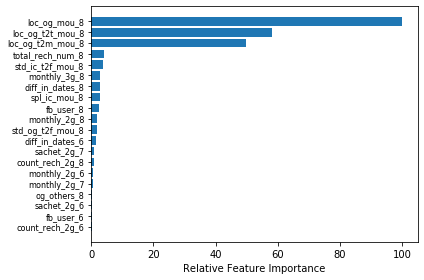

In [134]:

clf = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
clf.fit(X_train_new, y_train)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train_new.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Important if XGBoost used as the model

In [43]:
from xgboost import plot_importance

In [44]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
# fit model on training data with default hyperparameters
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
X_train_new=pd.DataFrame(X_train,columns=X.columns)
# feature importance
importance = dict(zip(X_train_new.columns, model.feature_importances_))

In [46]:
importances = dict((k, v) for k, v in importance.items() if v > 0)
importances

{'arpu_6': 0.0074781347,
 'arpu_7': 0.008702138,
 'arpu_8': 0.0138114635,
 'onnet_mou_7': 0.0054196334,
 'onnet_mou_8': 0.006809182,
 'offnet_mou_6': 0.002820433,
 'offnet_mou_7': 0.0036186639,
 'offnet_mou_8': 0.021713763,
 'roam_ic_mou_8': 0.016337112,
 'roam_og_mou_6': 0.0071165143,
 'roam_og_mou_7': 0.015018092,
 'roam_og_mou_8': 0.021906983,
 'loc_og_t2t_mou_7': 0.008761246,
 'loc_og_t2t_mou_8': 0.006528631,
 'loc_og_t2m_mou_6': 0.0028190427,
 'loc_og_t2m_mou_7': 0.004131826,
 'loc_og_t2m_mou_8': 0.029551638,
 'loc_og_t2f_mou_6': 0.0014543202,
 'loc_og_t2f_mou_7': 0.0054361997,
 'loc_og_t2f_mou_8': 0.019859746,
 'loc_og_t2c_mou_6': 0.005127115,
 'loc_og_t2c_mou_8': 0.0040068887,
 'loc_og_mou_7': 0.010640668,
 'loc_og_mou_8': 0.07594354,
 'std_og_t2t_mou_6': 0.0046367804,
 'std_og_t2t_mou_7': 0.004959237,
 'std_og_t2t_mou_8': 0.0065203165,
 'std_og_t2m_mou_7': 0.00419217,
 'std_og_t2m_mou_8': 0.008072742,
 'std_og_t2f_mou_6': 0.0021043047,
 'std_og_t2f_mou_8': 0.0038994087,
 'std_o

In [47]:
from collections import Counter 

In [49]:
k = Counter(importances) 

In [51]:
# Finding 3 highest values 
high = k.most_common(20) 

print("Top 20 highest predictors:") 
  
for i in high: 
    print(i[0]," :",i[1]," ") 

Top 20 highest predictors:
loc_og_mou_8  : 0.07594354  
total_ic_mou_8  : 0.06920277  
loc_ic_mou_8  : 0.05604348  
total_og_mou_8  : 0.04285637  
total_recharge_amt_8  : 0.035870045  
loc_og_t2m_mou_8  : 0.029551638  
std_og_mou_7  : 0.02708666  
total_rech_num_7  : 0.027002847  
last_day_rch_amt_8  : 0.026073689  
roam_og_mou_8  : 0.021906983  
offnet_mou_8  : 0.021713763  
total_og_mou_6  : 0.019928383  
loc_og_t2f_mou_8  : 0.019859746  
diff_in_dates_8  : 0.01770713  
vol_3g_mb_8  : 0.016874993  
jul_vbc_3g  : 0.016548615  
roam_ic_mou_8  : 0.016337112  
aug_vbc_3g  : 0.01618407  
total_rech_num_8  : 0.015025752  
roam_og_mou_7  : 0.015018092  


#### From the above observations we can derive some of the top features that can impact the churn like: 
   
*loc_og_mou_8   
*total_ic_mou_8   
*loc_ic_mou_8  
*total_og_mou_8 
*total_recharge_amt_8  

#### Strategies to follow, 
* Engaging the High value customers to generate more ARPU
* Ensuring smooth intra and external network call coverage facility
* Reducing the data rates to encourage customers to use more amount of data
* Creating Customer Loyalty programs